<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>PRÁCTICA 2</h2>
</div>  

# PROCESAMIENTO DE DATASET
Esta práctica consiste en eleccionar un Dataset de interés. Dado que el dataset de  [Contaminación del agua y calidad del aire](https://www.kaggle.com/datasets/victorahaji/worlds-air-quality-and-water-pollution-dataset) presenta valores que pueden no ser del todo precisos para analizar el efecto de una variante a lo largo del tiempo, por lo que se optó por uno diferente. 

Para el procesamiento se selecciónó el dataset de [Base de datos de cambios de temperatura](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Este dataset fue obtenido de la plataforma [Kaggle](https://www.kaggle.com/) y contiene los cambios de temperatura y el nivel de incertidumbre en la estimación promedio por país, por ciudad mayor y por estado. Para este procesamiento se ha seleccionado el dataset de países para poder hacer un procesamiento completo que permita un análisis integral de los cambios a nivel global. 

![Distribución promedio de la temperatura a nivel mundial](https://content.nationalgeographic.com.es/medio/2023/07/06/mapa-calor_d9ae1cb3_230706114545_1280x720.jpg)

                                    Figura 1. Distribución promedio de la temperatura en el planeta. 

## **ANÁLISIS EXPLORATORIO**
### Importar librerías y base de datos: 
Para iniciar con el procesamiento se importan las librerías de confianza que permiten hacer un análisis exploratorio de la base datos seleccionada y determinar si las variables de interés son de utilidad para realizar el procesamiento y cómo podrían ser empleadas en el desarrollo de un modelo. 

In [1]:
import pandas as pd
import re
import spacy as spc
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv(r'GlobalLandTemperaturesByCountry.csv')

### Visualización inicial 
Inicialmente se imprimen los datos de la base seleccionada para determinar los parámetros que contiene y poder indicar si son de utilidad. 

In [5]:
print (df)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...      

### Graficación inicial
Como indicador incial, se hace un análisis exploratorio de las variables en cada conjunto de datos para determinar cuales son de utilidad y cómo podrían ser utilizadas en el procesamiento del dataset. 

El primer gráfico corresponde a un boxplot  con el fin de visualizar la mediana, los cuartiles y detectar valores atípicos. 

<Axes: >

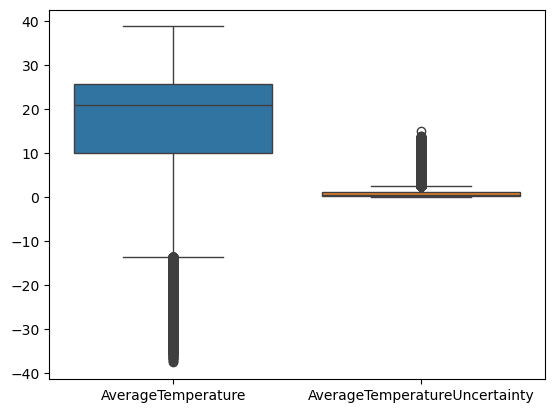

In [7]:
sns.boxplot(data=df)

Se procedó a realizar un análisis por medio de un histograma para los datos de temperatura y uno para la incertidumbre en la determinación de esta. 

Text(0, 0.5, 'Frecuencia')

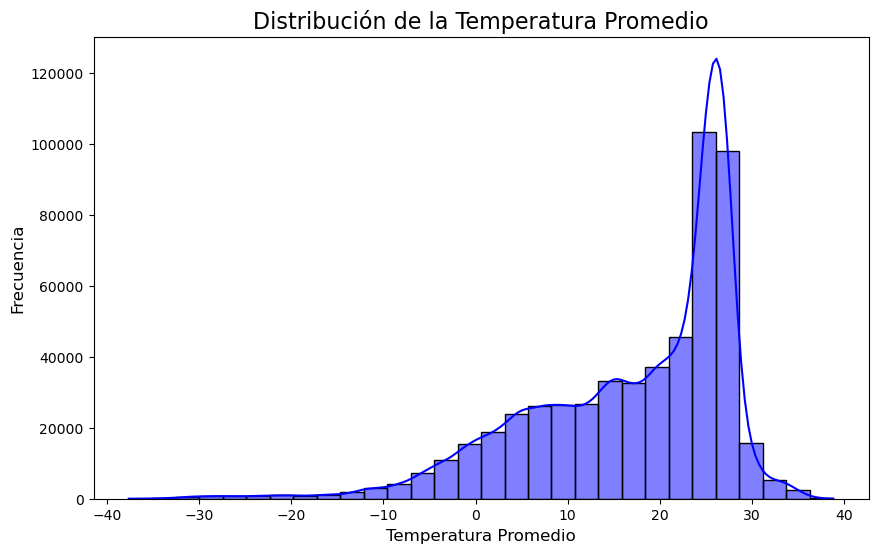

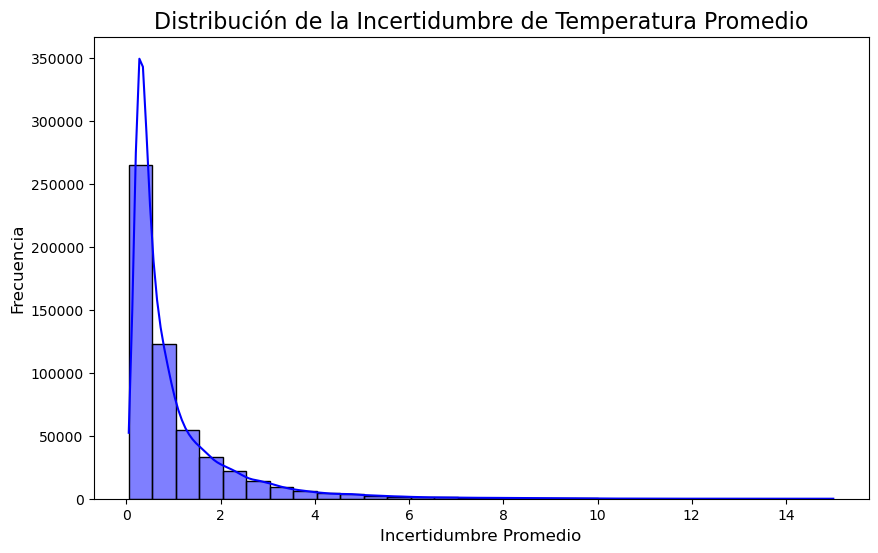

In [9]:
#Se introduce la función de histograma para la temperatura promedio 
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperature'], bins=30, kde=True, color='blue')

# Se asignan los nombres a los ejes 
plt.title('Distribución de la Temperatura Promedio', fontsize=16)
plt.xlabel('Temperatura Promedio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Se introduce la función de histograma para la incertidumbre de temperatura
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperatureUncertainty'], bins=30, kde=True, color='blue')

# Se asignan los nombres a los ejes 
plt.title('Distribución de la Incertidumbre de Temperatura Promedio', fontsize=16)
plt.xlabel('Incertidumbre Promedio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

Finalmente, se realizó un análisis de los datos contenidos en la base por medio de un diagrama de pares. 

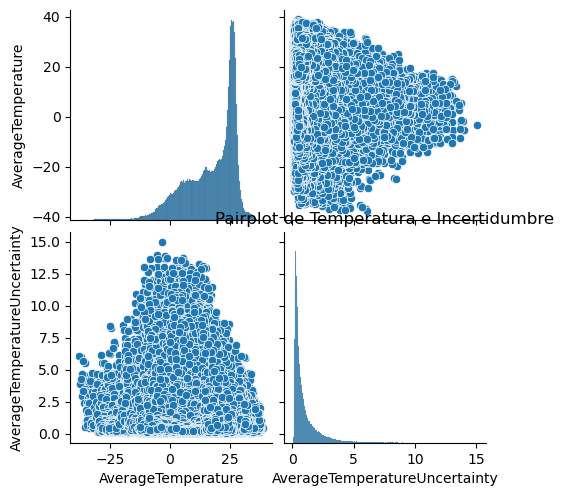

In [11]:
# Filtrar solo las columnas de interes
df_subset = df[['AverageTemperature', 'AverageTemperatureUncertainty']]

# Crear el pairplot solo para las comunas seleccionadas
sns.pairplot(df_subset)
plt.title('Pairplot de Temperatura e Incertidumbre')
plt.show()

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 8px; text-align:center">
  <h2>NOTA</h2>
  <h2>Como se puede observar la distribución de los datos tiene un sesgo muy notorio, esto es ocacionado por la distribión de temperaturas a nivel global (ver figura 1). Sin embargo, la cantidad de datos puede ser de utilidad para el análisis de los cambios globales. También se pudo observar una marcada cantidad de valores núlos, por lo cual se procede con el procesamiento del Dataset. </h2>
</div>  

<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>PRIMER PROCESAMIENTO</h2>
</div>  

# **LIMPIEZA DE DATOS**
### Eliminación de filas sin valores

El objetivo del procesamiento del presente dataset es el de analizar los cambios globales en temperaturas promedio. Como se ha podido observar en el análisis exploratorio, existe un una cosiderable cantidad de datos nulos (NaN), entre los analizados de temperatura promedio y nivel de incertidumbre, por eso se procede con el primer paso del procesamiento que es eliminar los datos que no contienen valor


In [13]:
# Se asigna la dunción de eliminado de elementos nulos
df1 = df.dropna(how='any')  
print(df1)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
5       1744-04-01               1.530                          4.680   
6       1744-05-01               6.702                          1.789   
7       1744-06-01              11.609                          1.577   
8       1744-07-01              15.342                          1.410   
...            ...                 ...                            ...   
577456  2013-04-01              21.142                          0.495   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   

         Country  
0          Åland  
5          Åland  
6          Åland  
7          Åland  
8          Åland  
...      

## Visualización de dataset sometido a tratamiento.

Para poder determinar si el tratamiento que se ha realizado al dataset no ha afectado la calidad de los datos, se realiza un sub **anális exploratorio** del resultado mediante gráficos generales empleados previamente (boxplot e histograma).

Incialmente se realiza el boxplot

<Axes: >

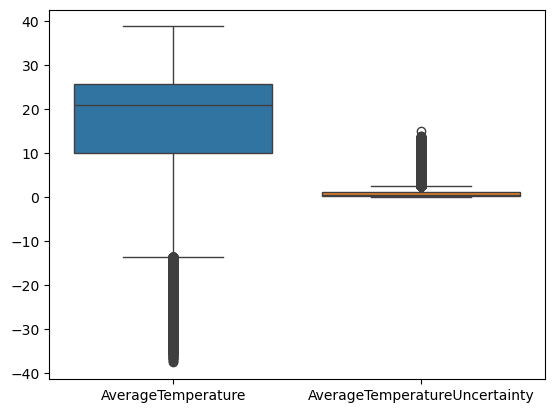

In [15]:
sns.boxplot(data=df1)

Consecutivamente se realiza el histograma, el cual ayudará a determinar si el tratamiento a afectado la calidad de los datos.

Text(0, 0.5, 'Frecuencia')

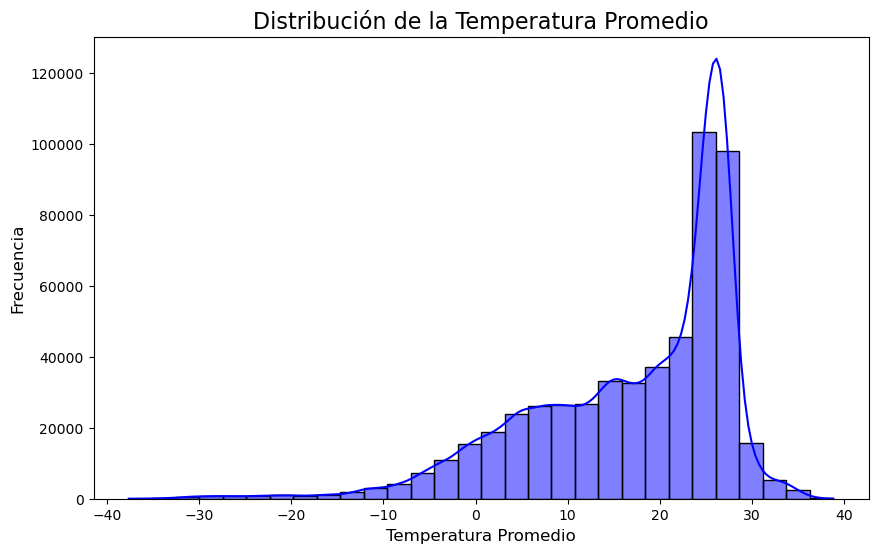

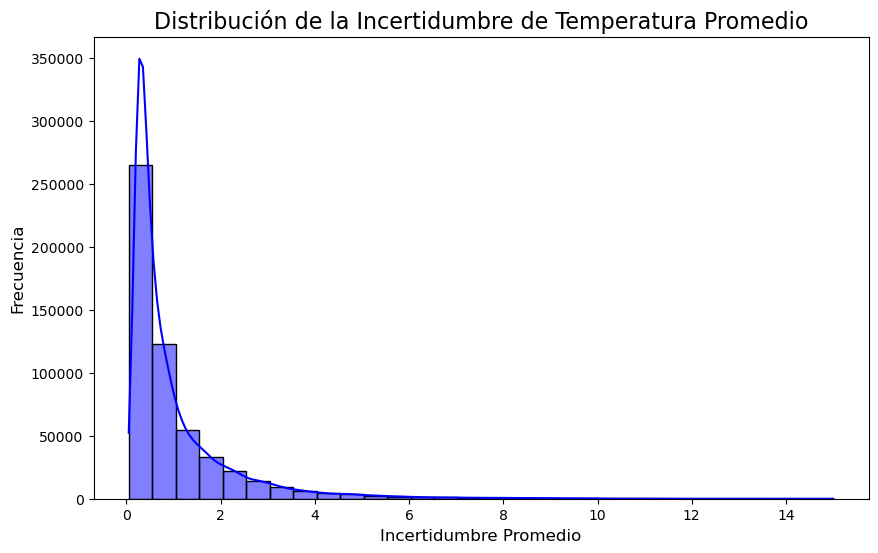

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['AverageTemperature'], bins=30, kde=True, color='blue')

plt.title('Distribución de la Temperatura Promedio', fontsize=16)
plt.xlabel('Temperatura Promedio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.figure(figsize=(10, 6))
sns.histplot(df1['AverageTemperatureUncertainty'], bins=30, kde=True, color='blue')

# Añadir título y etiquetas
plt.title('Distribución de la Incertidumbre de Temperatura Promedio', fontsize=16)
plt.xlabel('Incertidumbre Promedio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 8px; text-align:center">
  <h2>NOTA</h2>
  <h2>Como se puede apreciar en las gráficas generadas para los datos sometidos al primer tratamiento, el  eliminar entradas sin valores definidos no modifica el sesgo identificado previamente, indicando que los valores eliminados no afectan el comportamiento a nivel general de los datos.</h2>
</div>  

### Confirmación de fiabilidad 

Con el objetivo de determinar si los datos que se utilizarán para procesamientos posteriores serán de utilidad, se procedió a categorizar el nivel de incertidumbre de las mediciones de temperatura. Se asignó un rango de hasta 3 grados de incertidumbre y se graficó un histograma para visualizar de forma general y rápida la confiabilidad de las mediciones. 

<Axes: xlabel='Categoria', ylabel='Count'>

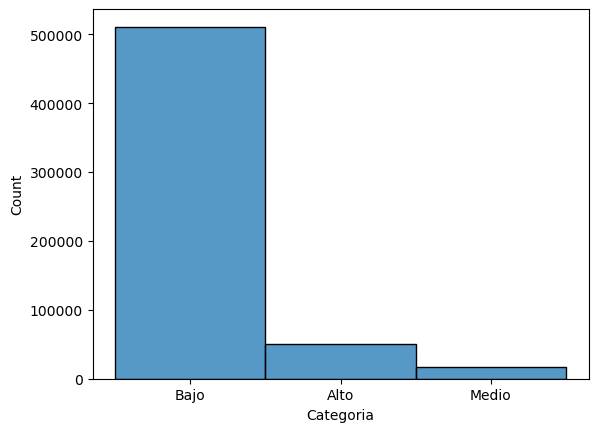

In [19]:
def categorizar_incertidumbre(incertidumbre):
    if incertidumbre < 3:
        return 'Bajo'
    elif 1 <= incertidumbre <= 4:
        return 'Medio'
    else:
        return 'Alto'
df1 = df[['AverageTemperatureUncertainty']].copy()
df1['Categoria'] = df1['AverageTemperatureUncertainty'].apply(categorizar_incertidumbre)

sns.histplot(df1['Categoria'])

### Conslusión del primer procesamiento 

El primer procesamiento aplicado a los datos, que consistió en eliminar valores nulos y categorizar el nivel de incertidumbre, ha demostrado ser fundamental para los análisis posteriores. Esta limpieza y clasificación de los datos no solo mejoran la calidad del conjunto de datos, sino que también facilitan un análisis más preciso de los cambios de temperatura a nivel global. Al abordar estos aspectos desde el inicio, se establecen las bases para realizar análisis estadísticos significativos y extraer conclusiones relevantes sobre las tendencias climáticas en el contexto actual.


<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>SEGUNDO PROCESAMIENTO</h2>
</div>  

# EXTRACCIÓN DE CARACTERÍSTICAS 

Para realizar un análisis detallado de los cambios en las temperaturas globales, se llevará a cabo el segundo tratamiento, que consiste en la extracción de características y la reagrupación de los datos por año. Este enfoque garantiza un análisis estadístico adecuado y significativo a nivel de ciudad, permitiendo así identificar patrones y tendencias en las variaciones de temperatura a lo largo del tiempo.


In [37]:
df_copy = df.copy()

if 'dt' in df_copy.columns:
    df_copy['dt'] = pd.to_datetime(df_copy['dt'], errors='coerce')
    print(f"Valores no convertibles a fecha: {df_copy['dt'].isna().sum()}")
    if not df_copy['dt'].isna().all():
        df_copy['year'] = df_copy['dt'].dt.year
if 'AverageTemperature' in df_copy.columns:
    temp1 = df_copy.groupby(['Country', 'year'])['AverageTemperature'].mean().reset_index()

    pivot_df = temp1.pivot_table(index='Country', columns='year', values='AverageTemperature')

    print(pivot_df)
    pivot_df.to_csv('TemperaturasPromedio.csv')

    df2 = pd.read_csv('TemperaturasPromedio.csv')
    print(df2)

Valores no convertibles a fecha: 0
year             1743       1744     1745       1750       1751      1752  \
Country                                                                     
Afghanistan       NaN        NaN      NaN        NaN        NaN       NaN   
Africa            NaN        NaN      NaN        NaN        NaN       NaN   
Albania         8.620  14.061875  5.58825  13.097909  13.573250  8.239833   
Algeria           NaN        NaN      NaN        NaN        NaN       NaN   
American Samoa    NaN        NaN      NaN        NaN        NaN       NaN   
...               ...        ...      ...        ...        ...       ...   
Western Sahara    NaN        NaN      NaN        NaN        NaN       NaN   
Yemen             NaN        NaN      NaN        NaN        NaN       NaN   
Zambia            NaN        NaN      NaN        NaN        NaN       NaN   
Zimbabwe          NaN        NaN      NaN        NaN        NaN       NaN   
Åland           4.384   6.698500 -3.89650

### Eliminación de filas sin valores

Como se pudo observar en los valores extraídidos a un nuevo dataset que nos petmita manejar mejor las condiciones de temperatura, han regresado un una los valores nulos (NaN), entre los analizados de temperatura promedio y nivel de incertidumbre, por eso se procede con el una segunda eliminación de los datos que no contienen valor, como se ha determinado previamente su fiabilidad después de este tratamiento, no será necesaria una visualización posterior mediante gráficos. 

In [39]:
df3 = df2.dropna(how='any')  
print(df3)

                     Country    1743       1744     1745       1750  \
2                    Albania   8.620  14.061875  5.58825  13.097909   
5                    Andorra   7.556  12.162750  5.56350  11.759364   
14                   Austria   2.482   7.784750 -0.97725   6.983545   
21                   Belarus   0.767   8.099625 -3.56450   6.690545   
22                   Belgium   7.106  10.681000  3.47225  10.341364   
28    Bosnia And Herzegovina   6.391  12.019750  3.17950  11.030455   
32                  Bulgaria   5.928  12.284000  2.62725  11.020000   
51                   Croatia   7.225  12.950250  4.04000  12.012909   
55            Czech Republic   4.167   9.247375  0.05500   8.458818   
58          Denmark (Europe)   6.507   9.130250  0.33925   8.797182   
67                   Estonia   0.727   6.937750 -5.09225   5.801909   
69                    Europe   3.942   9.395375  0.27475   8.590636   
71             Faroe Islands   6.105   6.842375  2.91325   7.164636   
74    

<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>TERCER PROCESAMIENTO</h2>
</div>  

Ahora, el análisis de los datos indica buena corelación y variablidad entre ellos, lo cual supone que se puede proceder al tercer procesamiento. Para cumplir con el objetivo de la presente práctica, que es identificar el calentamiento global se procede a aumentar las variables incluyendo la tendencia y la desviacióin estandar para un análisis estadístico preciso. 

# AUMENTO DE DATOS
Para poder mejorar el análisis estadístico, se calcula la tendencia y la desviación estándar de los datos con el fin de aumentar la precisión en la determinación de los cambios. La tendencia proporciona información sobre la dirección general de los datos a lo largo del tiempo, permitiendo identificar patrones y variaciones que pueden no ser evidentes a simple vista. Por otro lado, la desviación estándar mide la dispersión de los datos en relación con la media, lo que ayuda a entender la variabilidad y la incertidumbre asociada a las mediciones.

In [59]:
columnas_num = df3.select_dtypes(include=[np.number])

df3.loc[:, 'Desviacion'] = columnas_num.std(axis=1)

def calcular_tendencia(fila):
    x = np.arange(len(fila))
    y = fila.values
    coef = np.polyfit(x, y, 1)
    return coef[0]

df3.loc[:, 'Tendencia'] = columnas_num.apply(calcular_tendencia, axis=1)
print(df3)

                     Country    1743       1744     1745       1750  \
2                    Albania   8.620  14.061875  5.58825  13.097909   
5                    Andorra   7.556  12.162750  5.56350  11.759364   
14                   Austria   2.482   7.784750 -0.97725   6.983545   
21                   Belarus   0.767   8.099625 -3.56450   6.690545   
22                   Belgium   7.106  10.681000  3.47225  10.341364   
28    Bosnia And Herzegovina   6.391  12.019750  3.17950  11.030455   
32                  Bulgaria   5.928  12.284000  2.62725  11.020000   
51                   Croatia   7.225  12.950250  4.04000  12.012909   
55            Czech Republic   4.167   9.247375  0.05500   8.458818   
58          Denmark (Europe)   6.507   9.130250  0.33925   8.797182   
67                   Estonia   0.727   6.937750 -5.09225   5.801909   
69                    Europe   3.942   9.395375  0.27475   8.590636   
71             Faroe Islands   6.105   6.842375  2.91325   7.164636   
74    

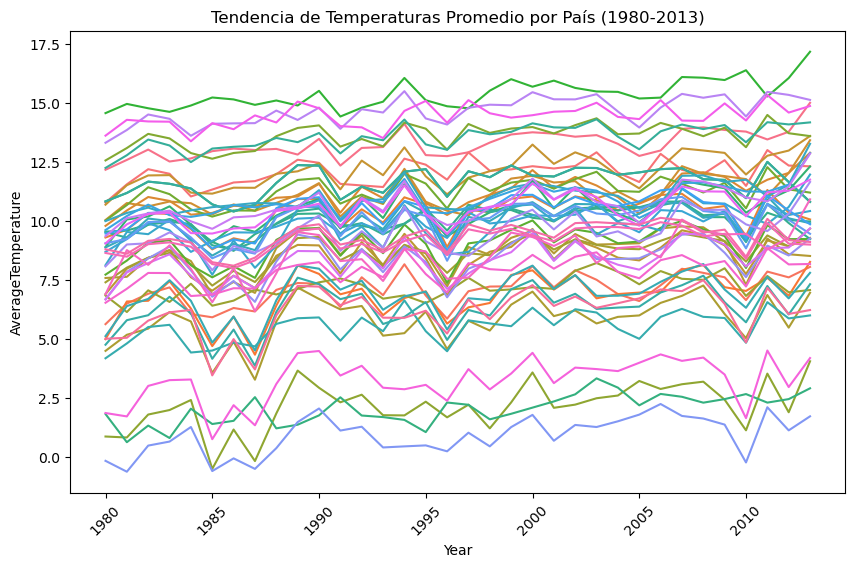

In [53]:
df_long = df3.melt(id_vars='Country', var_name='Year', value_name='AverageTemperature')
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long = df_long[(df_long['Year'] >= 1980) & (df_long['Year'] <= 2013)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='Year', y='AverageTemperature', hue='Country', legend=False)

plt.title('Tendencia de Temperaturas Promedio por País (1980-2013)')
plt.xticks(rotation=45)
plt.show()

Adicionalmente se grafica la distribución de la temperatura promedio por año, resultando en el siguiente diagrama.

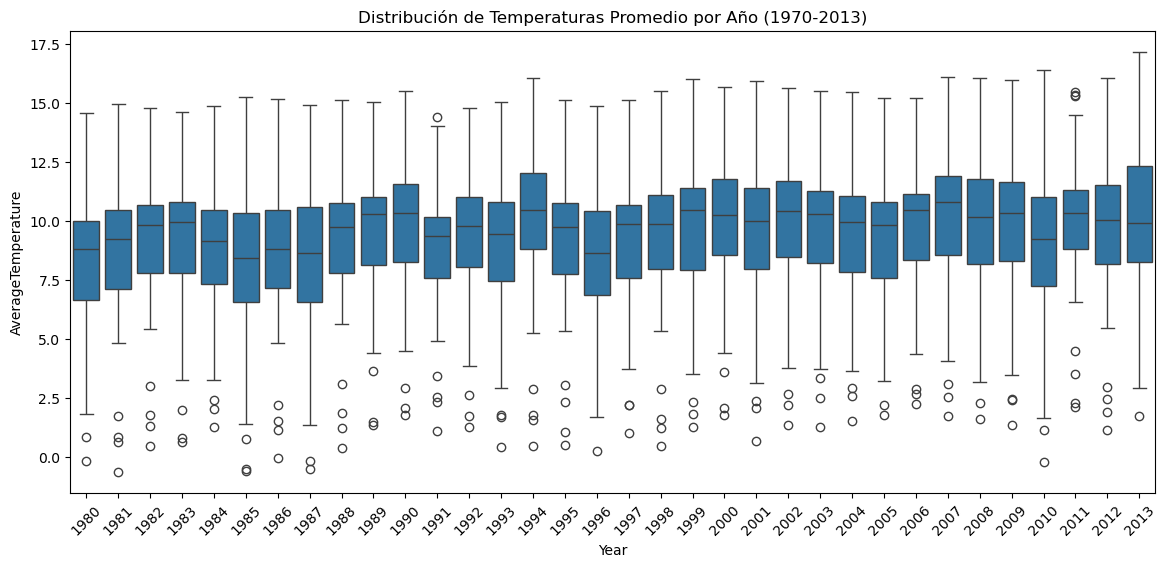

In [83]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_long, x='Year', y='AverageTemperature')

# Añadir título y mostrar
plt.title('Distribución de Temperaturas Promedio por Año (1970-2013)')
plt.xticks(rotation=45)
plt.show()

Sucesivamente, se grafican la desviación estándar y la tendencia para visualizar de manera clara y efectiva los patrones en los datos aumentados. Estas gráficas permiten identificar variaciones significativas y fluctuaciones en las mediciones, lo que ayuda a comprender cómo se comportan los datos a lo largo del tiempo. La representación gráfica de la tendencia proporciona una perspectiva intuitiva sobre la dirección general de los datos, mientras que la desviación estándar ilustra la variabilidad y la dispersión en torno a esa tendencia.

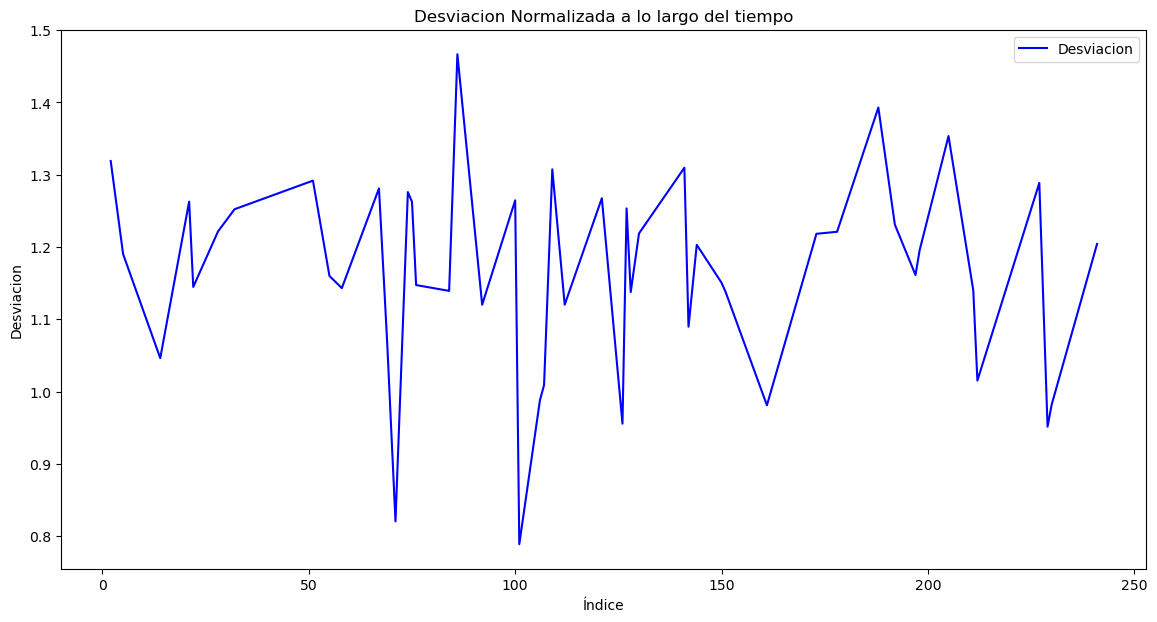

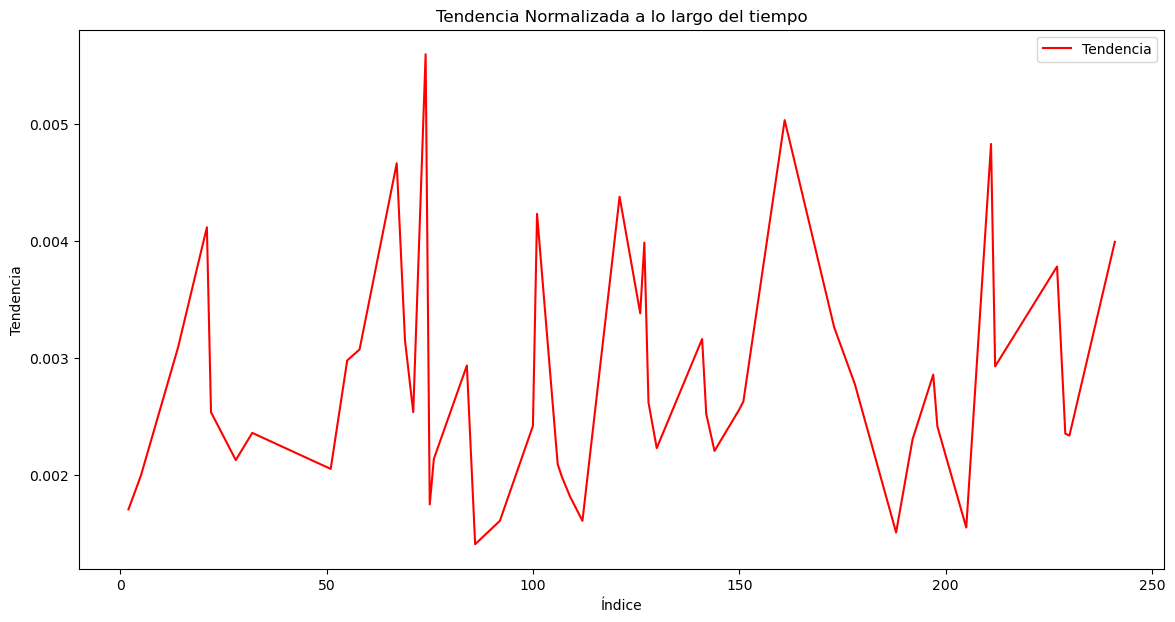

In [61]:
# Crea una figura para la desviación estándar
plt.figure(figsize=(14, 7))
sns.lineplot(data=df3, x=df3.index, y='Desviacion', label='Desviacion', color='b')
plt.title('Desviacion Normalizada a lo largo del tiempo')
plt.ylabel('Desviacion')
plt.xlabel('Índice')
plt.legend()
plt.show()

# Crea una figura para la tendencia
plt.figure(figsize=(14, 7))
sns.lineplot(data=df3, x=df3.index, y='Tendencia', label='Tendencia', color='r')
plt.title('Tendencia Normalizada a lo largo del tiempo')
plt.ylabel('Tendencia')
plt.xlabel('Índice')
plt.legend()
plt.show()

A pesar de que las gráficas iniciales pueden parecer dispersas, con valores que fluctúan de manera significativa, es importante destacar que estos datos en realidad siguen una tendencia subyacente. Para poder visualizar claramente esta tendencia, se llevará a cabo una regresión lineal. Este enfoque permitirá ajustar una línea que represente la relación general entre las variables, suavizando las fluctuaciones y resaltando el patrón de cambio a largo plazo.

## Regresión lineal 

La regresión lineal no solo facilitará la identificación de la tendencia predominante en los datos, sino que también proporcionará una base cuantitativa para evaluar la fuerza y dirección de dicha tendencia. Al incorporar esta línea de regresión en la gráfica, se mejorará la interpretación de los datos, permitiendo a los analistas y a los interesados comprender mejor las dinámicas subyacentes que pueden no ser evidentes a simple vista.

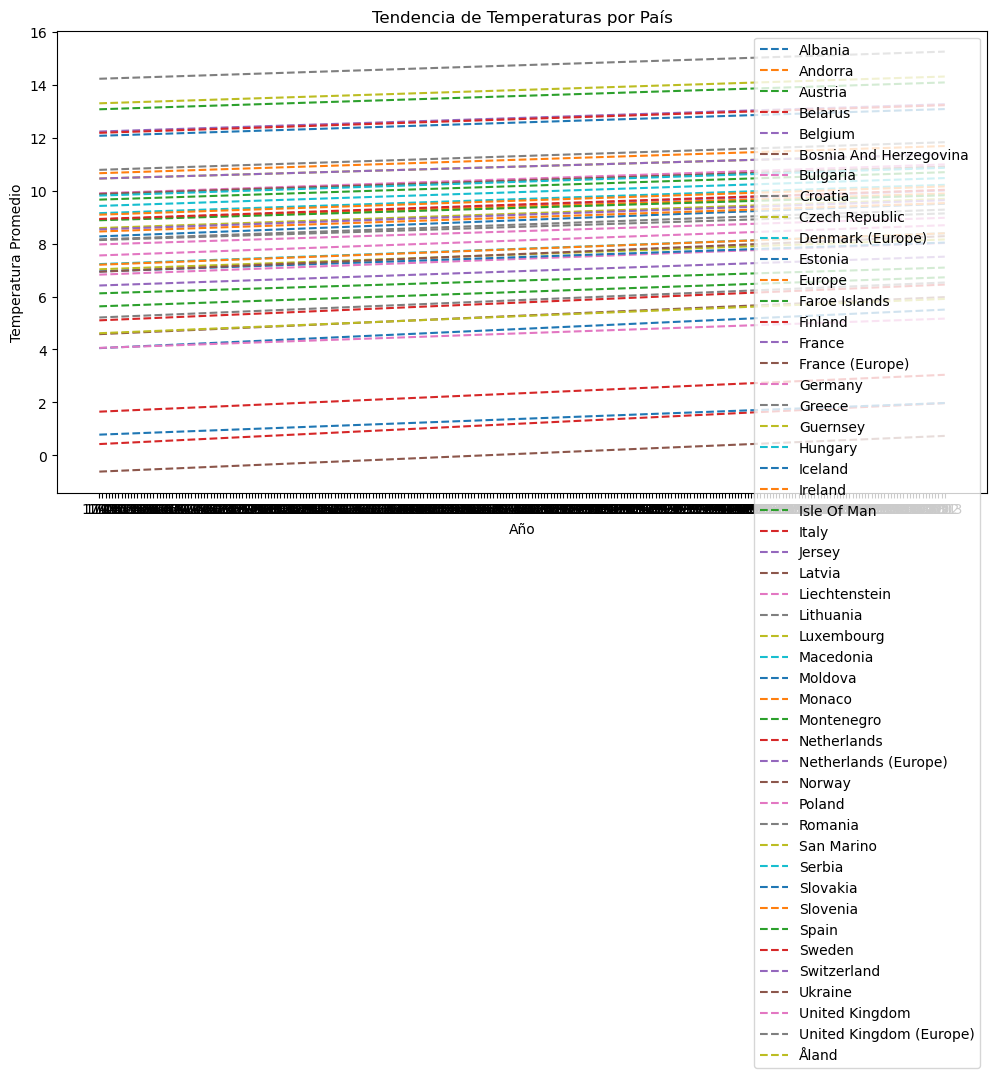

In [71]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = np.array(range(len(df3.columns[1:-2])))  
X = X.reshape(-1, 1) 

predicciones = []

for index, row in df3.iterrows():
    y = row[1:-2].values  
    modelo = LinearRegression()
    modelo.fit(X, y)  
    
    tendencia = modelo.predict(X)  
    predicciones.append(tendencia)

predicciones = np.array(predicciones)

plt.figure(figsize=(12, 6))
for i in range(len(predicciones)):
    plt.plot(df3.columns[1:-2], predicciones[i], label=df3.iloc[i]['Country'], linestyle='--')  # Usar iloc

plt.title('Tendencia de Temperaturas por País')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio')
plt.legend()
plt.show() 



In [81]:
df3_copy = df3.copy()

aumentos_temperatura = []

X = np.array(range(len(df3_copy.columns[1:-2])))  
X = X.reshape(-1, 1) 

for index, row in df3_copy.iterrows():
    y = row[1:-2].values  
    modelo = LinearRegression()
    modelo.fit(X, y)  
    pendiente = modelo.coef_[0]  
    aumentos_temperatura.append(pendiente)

df3_copy['AumentoTemperatura'] = aumentos_temperatura

print(df3_copy[['Country', 'AumentoTemperatura']])

                     Country  AumentoTemperatura
2                    Albania            0.002817
5                    Andorra            0.002984
14                   Austria            0.003648
21                   Belarus            0.004650
22                   Belgium            0.003378
28    Bosnia And Herzegovina            0.003046
32                  Bulgaria            0.003285
51                   Croatia            0.003051
55            Czech Republic            0.003659
58          Denmark (Europe)            0.003773
67                   Estonia            0.005117
69                    Europe            0.003853
71             Faroe Islands            0.003133
74                   Finland            0.005756
75                    France            0.002880
76           France (Europe)            0.003060
84                   Germany            0.003662
86                    Greece            0.002709
92                  Guernsey            0.002575
100                 

### Mapa de calor 
Un mapa de calor proporciona una representación visual clara de los aumentos y disminuciones más significativos en las temperaturas a lo largo del tiempo. A través de este tipo de visualización, se pueden identificar fácilmente los países más afectados por el cambio de temperatura global, lo que permite un análisis más profundo y comprensible de las tendencias climáticas. 

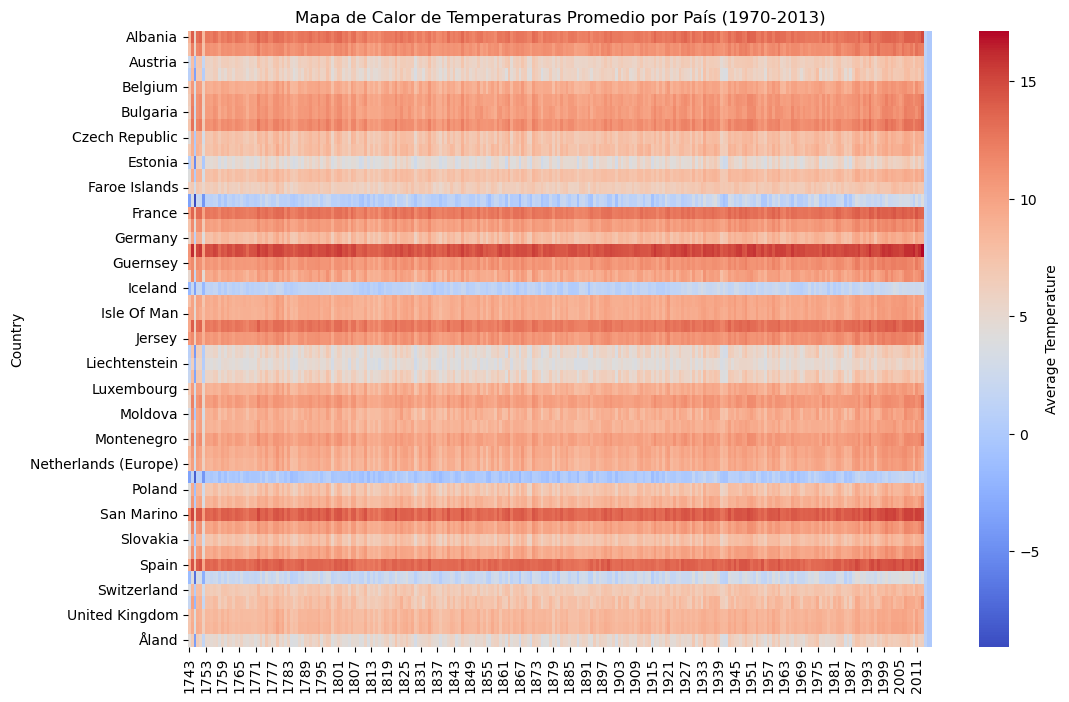

In [91]:
plt.figure(figsize=(12, 8))
sns.heatmap(df3.set_index('Country'), cmap='coolwarm', annot=False, cbar_kws={'label': 'Average Temperature'})

# Añadir título y mostrar
plt.title('Mapa de Calor de Temperaturas Promedio por País (1970-2013)')
plt.show()

<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>CONCLUSIÓN GENERAL</h2>
</div>  

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 10px; text-align:center">
  <h2>En conclusión, el procesamiento del dataset sobre la temperatura global por país ha sido fundamental para identificar las tendencias en el aumento de temperatura a nivel global. A través de este análisis, se ha evidenciado que países como Alemania, España, Francia, Albania y San Marino son algunos de los más afectados por estos cambios térmicos. Este tipo de análisis, que utiliza bases de datos abiertas y modelos estadísticos implementados mediante herramientas computacionales como Python, representa un avance significativo en nuestra comprensión del cambio climático global. Al facilitar la visualización y el análisis de datos, estas metodologías no solo enriquecen nuestro conocimiento sobre las tendencias climáticas, sino que también contribuyen a la formulación de estrategias efectivas para mitigar el impacto del cambio climático. </h2>
</div> 

                                    Nota adicional: ¡Cuidemos el planeta! :)